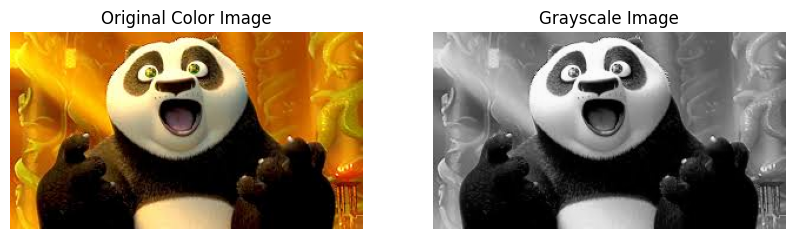

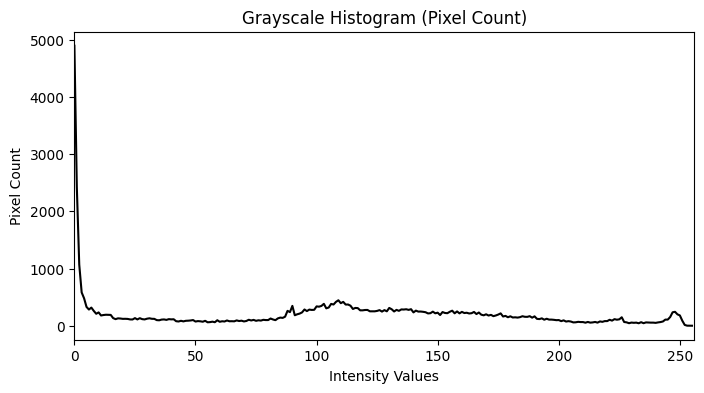

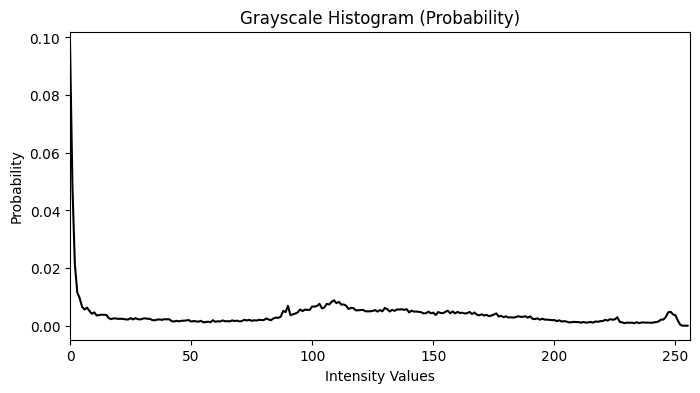

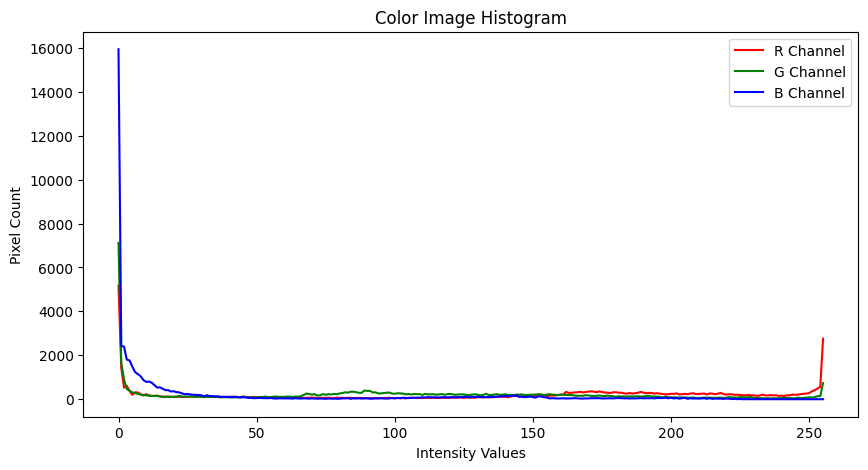

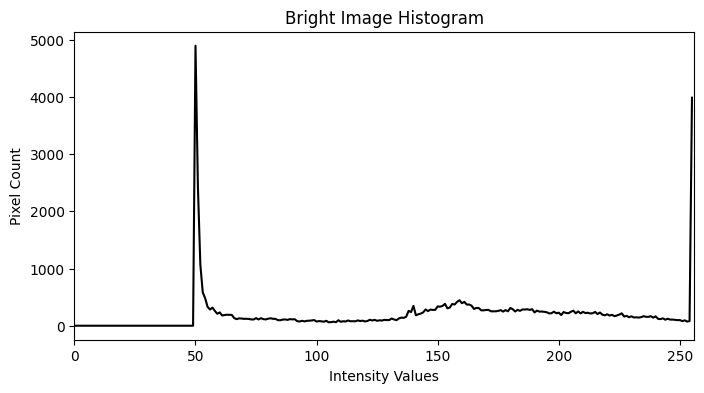

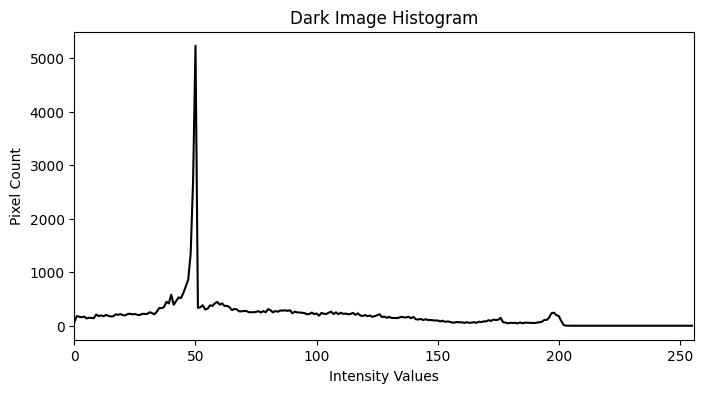

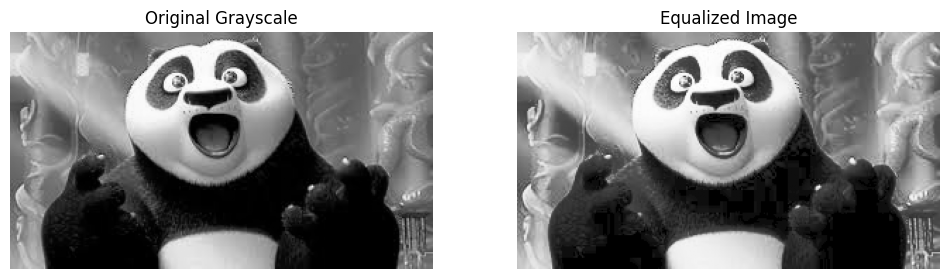

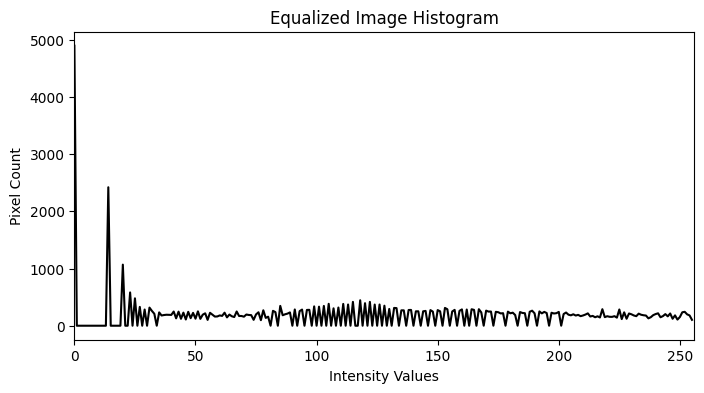

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Histogram Value Computation and Visualization

# Read the color image using OpenCV (BGR format by default)
color_image = cv2.imread('/content/po.jpeg')  # Replace with the correct path to your image

# Convert the BGR image to RGB for correct color display in matplotlib
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Convert the color image to grayscale for single-channel processing
grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)

# Display the original color and grayscale images
plt.figure(figsize=(10, 5))

# Display color image
plt.subplot(1, 2, 1)
plt.imshow(color_image)
plt.title("Original Color Image")
plt.axis('off')

# Display grayscale image
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# Function to plot the histogram of an image
def plot_histogram(image, title, method="count"):
    # Calculate the histogram using OpenCV's calcHist function
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # If method is probability, normalize the histogram by dividing by the total number of pixels
    if method == "probability":
        hist /= hist.sum()

    # Plot the histogram
    plt.figure(figsize=(8, 4))
    plt.title(title)
    plt.xlabel("Intensity Values")
    plt.ylabel("Probability" if method == "probability" else "Pixel Count")
    plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.show()

# Plot grayscale image histograms
plot_histogram(grayscale_image, "Grayscale Histogram (Pixel Count)")
plot_histogram(grayscale_image, "Grayscale Histogram (Probability)", method="probability")

# Plot histograms for each channel of the color image
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 5))
for i, color in enumerate(colors):
    channel = color_image[:, :, i]  # Extract individual color channel
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])  # Calculate histogram for the channel
    plt.plot(hist, color=color, label=f"{color.upper()} Channel")

plt.title("Color Image Histogram")
plt.xlabel("Intensity Values")
plt.ylabel("Pixel Count")
plt.legend()
plt.show()

# Create and analyze histograms for bright and dark versions of the grayscale image
bright_image = cv2.convertScaleAbs(grayscale_image, alpha=1.0, beta=50)  # Increase brightness
dark_image = cv2.convertScaleAbs(grayscale_image, alpha=1.0, beta=-50)  # Decrease brightness

plot_histogram(bright_image, "Bright Image Histogram")
plot_histogram(dark_image, "Dark Image Histogram")

# Apply histogram equalization to enhance contrast
equalized_image = cv2.equalizeHist(grayscale_image)

# Display the original grayscale and equalized images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')
plt.show()

# Plot histogram of the equalized image to observe contrast improvement
plot_histogram(equalized_image, "Equalized Image Histogram")

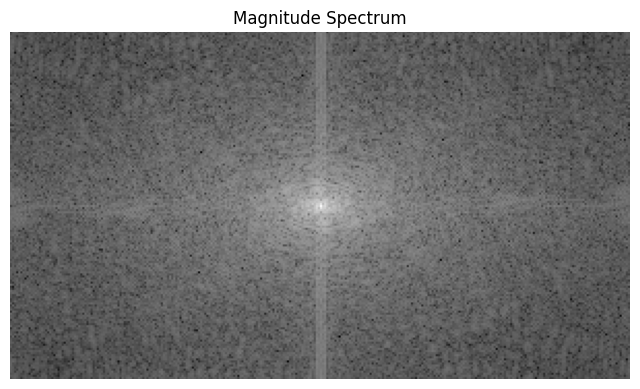

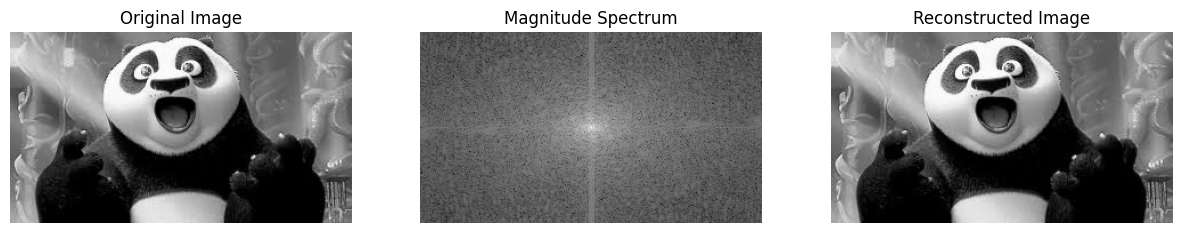

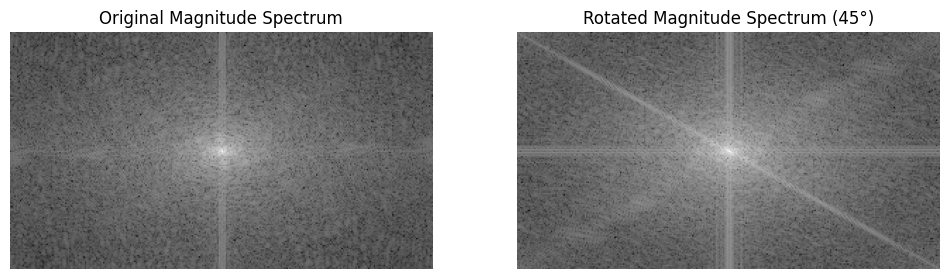

In [7]:
# Compute the 2D FFT of the grayscale image
fft_image = np.fft.fft2(grayscale_image)  # Apply FFT to image
fft_shifted = np.fft.fftshift(fft_image)  # Shift zero frequency to center

# Calculate and display magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(fft_shifted) + 1)  # Log scale to enhance visibility
plt.figure(figsize=(8, 6))
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()

# Perform inverse FFT to reconstruct the image
ifft_shifted = np.fft.ifftshift(fft_shifted)  # Reverse shift
reconstructed_image = np.abs(np.fft.ifft2(ifft_shifted))  # Reconstruct and remove imaginary part

# Display original, magnitude spectrum, and reconstructed images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')
plt.show()

# Verify the Rotation Property of Fourier Transform
angle = 45  # Rotation angle in degrees
rows, cols = grayscale_image.shape
center = (cols // 2, rows // 2)  # Image center
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)  # Create rotation matrix
rotated_image = cv2.warpAffine(grayscale_image, rotation_matrix, (cols, rows))  # Rotate image

# Compute FFT of rotated image
fft_rotated = np.fft.fft2(rotated_image)
fft_rotated_shifted = np.fft.fftshift(fft_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(fft_rotated_shifted) + 1)

# Compare magnitude spectra before and after rotation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Original Magnitude Spectrum")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.title(f"Rotated Magnitude Spectrum ({angle}°)")
plt.axis('off')
plt.show()